# Customer Segmentation 

Utilize RFM analysis on E-Commerce Dataset. 
Dataset pulled from: https://archive.ics.uci.edu/ml/datasets/online+retail

Perform segmentation. Look for different types of customers. Use K-Means Clustering to identify appropriate number of groups.

Data does not look spherical. Need to use another type of clustering algorithm. First need a better way to visualize the dataset. Some ideas for other clustering: GMM, HAC, DBSCan. 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data.csv", parse_dates= ['InvoiceDate'])
df.columns = df.columns.str.lower()
df['date'] = df['invoicedate'].dt.date

df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


## Performing RFM analysis on Customers
- Recency: When did a client last purchase?
- Frequency: How often did a client purchase?
- Monetary: How much did a client pruchase?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    541909 non-null  object        
 1   stockcode    541909 non-null  object        
 2   description  540455 non-null  object        
 3   quantity     541909 non-null  int64         
 4   invoicedate  541909 non-null  datetime64[ns]
 5   unitprice    541909 non-null  float64       
 6   customerid   406829 non-null  float64       
 7   country      541909 non-null  object        
 8   date         541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [5]:
df[['quantity', 'unitprice']].describe()

,quantity,unitprice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [6]:
df[df['customerid'].isnull()]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,date
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,2010-12-01
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010-12-01
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2010-12-01
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,2010-12-01
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,2011-12-09
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,2011-12-09
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,2011-12-09
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,2011-12-09


In [7]:
#df[(df['quantity'] < 0 ) & (df['stockcode'] == '23169')]
df[(df['invoiceno'].str.slice(0, 1) != 'C') & (df['quantity'] < 0) ]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,date
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,2010-12-01
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,2010-12-02
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,2010-12-03
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,2010-12-03
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,2010-12-03
...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom,2011-12-07
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom,2011-12-07
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom,2011-12-07
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom,2011-12-08


In [8]:
df[(df['stockcode'] == '35004C') ].sort_values(by = 'date')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,date
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010-12-01
200,536389,35004C,SET OF 3 COLOURED FLYING DUCKS,6,2010-12-01 10:03:00,5.45,12431.0,Australia,2010-12-01
297,536397,35004C,SET OF 3 COLOURED FLYING DUCKS,48,2010-12-01 10:51:00,4.65,17924.0,United Kingdom,2010-12-01
2316,536576,35004C,SET OF 3 COLOURED FLYING DUCKS,120,2010-12-01 16:11:00,4.65,13777.0,United Kingdom,2010-12-01
3933,536739,35004C,SET OF 3 COLOURED FLYING DUCKS,3,2010-12-02 13:08:00,5.45,14180.0,United Kingdom,2010-12-02
6544,536947,35004C,SET OF 3 COLOURED FLYING DUCKS,3,2010-12-03 12:29:00,5.45,13013.0,United Kingdom,2010-12-03
7417,537036,35004C,SET OF 3 COLOURED FLYING DUCKS,1,2010-12-03 17:28:00,5.45,15545.0,United Kingdom,2010-12-03
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05 13:55:00,4.65,15311.0,United Kingdom,2010-12-05
17311,537700,35004C,SET OF 3 COLOURED FLYING DUCKS,48,2010-12-08 10:51:00,4.65,18229.0,United Kingdom,2010-12-08
17451,537762,35004C,SET OF 3 COLOURED FLYING DUCKS,3,2010-12-08 12:01:00,5.45,16558.0,United Kingdom,2010-12-08


## Filter the dataset

In [9]:
df = df.dropna()
df = df[df['quantity'] > 0]
df.head(25)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01


In [10]:
df['amt'] = df['quantity'] * df['unitprice']
df[['amt',
    'quantity', 
    'unitprice'
]].describe()

,amt,quantity,unitprice
count,397924.000000,397924.000000,397924.000000
mean,22.394749,13.021823,3.116174
std,309.055588,180.420210,22.096788
min,0.000000,1.000000,0.000000
25%,4.680000,2.000000,1.250000
50%,11.800000,6.000000,1.950000
75%,19.800000,12.000000,3.750000
max,168469.600000,80995.000000,8142.750000


In [11]:
df_group = df[['invoiceno', 'stockcode', 'quantity', 'unitprice', 'amt', 'customerid', 'country', 'date']]
df_group = df_group.groupby(['customerid', 'country', 'date', 'invoiceno']).agg({
        'amt' : ['sum'],
    'stockcode':['count'],
    'quantity' : ['count']

}).reset_index()
    

df_group['total_amount'] = df_group[('amt', 'sum')]
df_group['num_product_types_purchased'] = df_group[('stockcode', 'count')]
df_group['num_product_quantity_purchased'] = df_group[('quantity', 'count')]
df_group = df_group[['customerid', 'country', 'date', 'invoiceno', 'total_amount', 'num_product_types_purchased', 
         'num_product_quantity_purchased']]


In [12]:
df_group[['customerid', 'country']].groupby(['customerid']).agg({
    'country':['nunique']
}).reset_index().sort_values(by=[('country', 'nunique')])

,customerid,country
,,nunique
0,12346.0,1
2884,16274.0,1
2885,16275.0,1
2886,16276.0,1
2887,16278.0,1
...,...,...
60,12422.0,2
56,12417.0,2
92,12457.0,2


In [13]:
df_group[df_group['customerid'].isin({12417, 12422, 12394, 12429 }) ]

,customerid,country,date,invoiceno,total_amount,num_product_types_purchased,num_product_quantity_purchased
,,,,,,,
106,12394.0,Belgium,2011-05-06,552188,381.08,21,21
107,12394.0,Denmark,2011-10-07,569997,891.40,6,6
178,12417.0,Belgium,2010-12-17,539391,291.34,11,11
179,12417.0,Belgium,2011-01-25,541991,323.44,16,16
180,12417.0,Belgium,2011-03-03,545536,410.00,19,19
181,12417.0,Belgium,2011-06-05,555574,437.19,23,23
182,12417.0,Belgium,2011-08-04,562445,355.56,21,21
183,12417.0,Belgium,2011-08-25,564378,562.69,35,35
184,12417.0,Belgium,2011-10-31,573656,462.85,24,24


In [14]:
# for now just going to ignore the country stuff
df_group = df_group.groupby(['customerid']).agg({
    'date':['count', 'max'],
    'invoiceno': ['nunique'],
    'total_amount' : ['sum', 'mean'],
    'num_product_types_purchased': ['sum', 'mean'],
    'num_product_quantity_purchased': ['sum', 'mean']
}).reset_index()
df_group.head(25)

customerid  date             invoiceno total_amount                \
              count         max   nunique          sum          mean   
0     12346.0     1  2011-01-18         1     77183.60  77183.600000   
1     12347.0     7  2011-12-07         7      4310.00    615.714286   
2     12348.0     4  2011-09-25         4      1797.24    449.310000   
3     12349.0     1  2011-11-21         1      1757.55   1757.550000   
4     12350.0     1  2011-02-02         1       334.40    334.400000   
5     12352.0     8  2011-11-03         8      2506.04    313.255000   
6     12353.0     1  2011-05-19         1        89.00     89.000000   
7     12354.0     1  2011-04-21         1      1079.40   1079.400000   
8     12355.0     1  2011-05-09         1       459.40    459.400000   
9     12356.0     3  2011-11-17         3      2811.43    937.143333   
10    12357.0     1  2011-11-06         1      6207.67   6207.670000   
11    12358.0     2  2011-12-08         2      1168.06    584.030000   
12    12359.0     4  2011-10-13         4      6372.58   1593.145000   
13    12360.0     3  2011-10-18         3      2662.06    887.353333   
14    12361.0     1  2011-02-25         1       189.90    189.900000   
15    12362.0    10  2011-12-06        10      5226.23    522.623000   
16    12363.0     2  2011-08-22         2       552.00    276.000000   
17    12364.0     4  2011-12-02         4      1313.10    328.275000   
18    12365.0     2  2011-02-21         2       641.38    320.690000   
19    12367.0     1  2011-12-05         1       168.90    168.900000   
20    12370.0     4  2011-10-19         4      3545.69    886.422500   
21    12371.0     2  2011-10-26         2      1887.96    943.980000   
22    12372.0     3  2011-09-29         3      1298.04    432.680000   
23    12373.0     1  2011-02-01         1       364.60    364.600000   
24    12374.0     1  2011-11-14         1       742.93    742.930000   

   num_product_types_purchased             num_product_quantity_purchased  \
                           sum        mean                            sum   
0                            1    1.000000                              1   
1                          182   26.000000                            182   
2                           31    7.750000                             31   
3                           73   73.000000                             73   
4                           17   17.000000                             17   
5                           85   10.625000                             85   
6                            4    4.000000                              4   
7                           58   58.000000                             58   
8                           13   13.000000                             13   
9                           59   19.666667                             59   
10                         131  131.000000                            131   
11                          19    9.500000                             19   
12                         248   62.000000                            248   
13                         129   43.000000                            129   
14                          10   10.000000                             10   
15                         266   26.600000                            266   
16                          23   11.500000                             23   
17                          85   21.250000                             85   
18                          22   11.000000                             22   
19                          11   11.000000                             11   
20                         167   41.750000                            167   
21                          63   31.500000                             63   
22                          52   17.333333                             52   
23                          14   14.000000                             14   
24                          33   33.000000              

In [45]:
df_group['frequency'] = df_group[('date', 'count')]
df_group['recency'] = (df_group[('date', 'max')].max() - df_group[('date', 'max')]).dt.days
df_group['monetary_all'] = df_group[('total_amount', 'sum')]
df_group['monetary_mean'] = df_group[('total_amount', 'mean')]

rfm = df_group[['customerid',  'recency', 'frequency', 'monetary_all', 'monetary_mean']]
rfm.set_index('customerid', inplace=True)
rfm.head()

,recency,frequency,monetary_all,monetary_mean
,,,,
customerid,,,,
12346.0,325,1,77183.60,77183.600000
12347.0,2,7,4310.00,615.714286
12348.0,75,4,1797.24,449.310000
12349.0,18,1,1757.55,1757.550000
12350.0,310,1,334.40,334.400000


In [46]:
rfm.corr()

,,recency,frequency,monetary_all,monetary_mean
,,,,,
recency,,1.000000,-0.260459,-0.122190,-0.000349
frequency,,-0.260459,1.000000,0.554094,0.019052
monetary_all,,-0.122190,0.554094,1.000000,0.393286
monetary_mean,,-0.000349,0.019052,0.393286,1.000000


## Determine number of segments using K-Means Clustering

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

C:\Users\adelynyeoh\Anaconda3\envs\working_python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adelynyeoh\Anaconda3\envs\working_python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adelynyeoh\Anaconda3\envs\working_python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

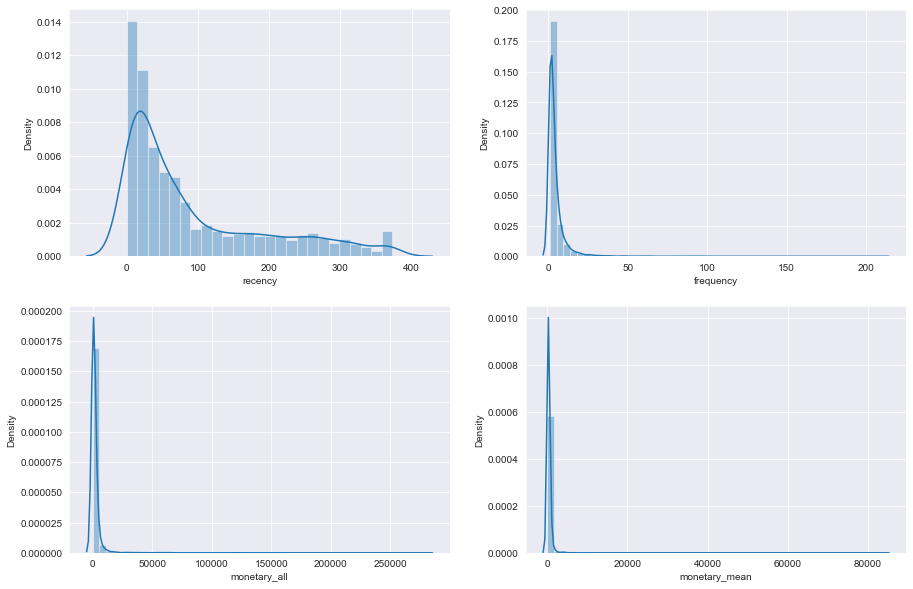

In [66]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
plot_recency = sns.distplot(rfm['recency'], ax=ax1)
plot_frequency = sns.distplot(rfm['frequency'], ax=ax2)
plot_monetary = sns.distplot(rfm['monetary_all'], ax=ax3)
plot_monetary = sns.distplot(rfm['monetary_mean'], ax=ax4)

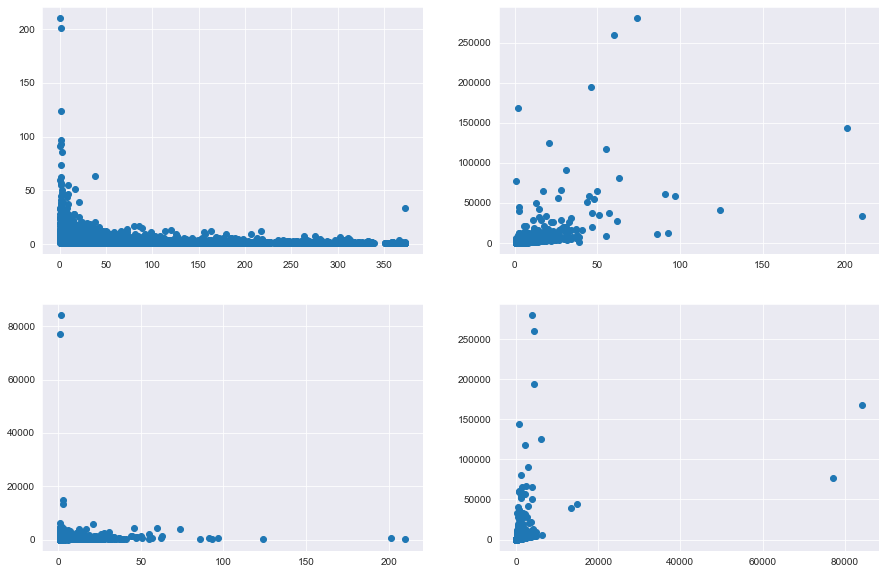

In [69]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

ax1.scatter(rfm['recency'], rfm['frequency'])
ax2.scatter(rfm['frequency'], rfm['monetary_all'])
ax3.scatter(rfm['frequency'], rfm['monetary_mean'])
ax4.scatter(rfm['monetary_mean'], rfm['monetary_all'])


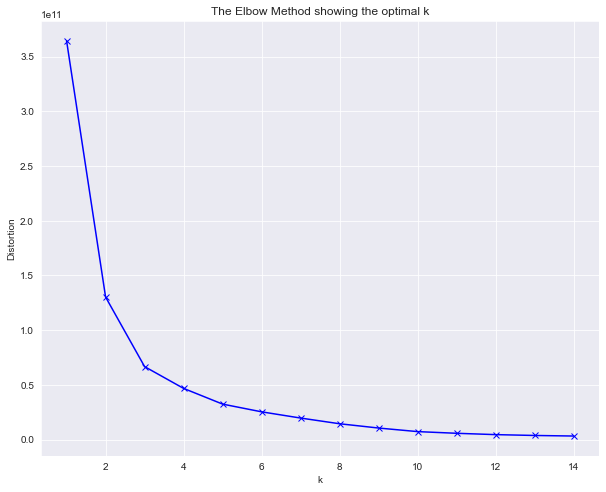

In [59]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

krange = [x for x in range(1, 15)]
distortions = []

X = rfm
for k in krange:
    kmeans_model = KMeans(n_clusters=k).fit(X)
    kmeans_model.fit(X)
    #distortions.append(sum(np.min(cdist(X, kmeans_model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    distortions.append(kmeans_model.inertia_)
    
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plt.plot(krange, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
    

Comment: Doubtful that KMeans will work for this use case. Will try alternative clustering methods. Given that the data does not seem spherical.